**DATA CLEANING**

**1. Reading Data and preliminary data inspection**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import timedelta
from pandas import ExcelWriter

In [ ]:
df = pd.read_csv('/content/Online Retail.csv', encoding='latin-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(37309, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37309 entries, 0 to 37308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    37309 non-null  object 
 1   StockCode    37309 non-null  object 
 2   Description  37192 non-null  object 
 3   Quantity     37309 non-null  int64  
 4   InvoiceDate  37309 non-null  object 
 5   UnitPrice    37308 non-null  float64
 6   CustomerID   24429 non-null  float64
 7   Country      37308 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


**(a) Missing values treatment**

In [ ]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      117
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     12880
Country            1
dtype: int64

Calculating the Missing Values % contribution in DF

In [ ]:
df_null = round(df.isnull().sum()/len(df)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.31
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     34.52
Country         0.00
dtype: float64

In [ ]:
invoice_null_custid = set(df[df['CustomerID'].isnull()]['InvoiceNo'])
df[df['InvoiceNo'].isin(invoice_null_custid) & (~df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37280,539456,90154,LAZER CUT NECKLACE W PASTEL BEADS,1,12/17/2010 17:23,8.95,16885.0,United Kingdom
37281,539456,90199D,5 STRAND GLASS NECKLACE AMBER,1,12/17/2010 17:23,6.35,16885.0,United Kingdom
37282,539456,90185D,CRYSTAL DIAMANTE EXPANDABLE RING,2,12/17/2010 17:23,4.25,16885.0,United Kingdom
37283,539456,90200A,PURPLE SWEETHEART BRACELET,2,12/17/2010 17:23,4.25,16885.0,United Kingdom
37284,539456,90014A,SILVER/MOP ORBIT NECKLACE,1,12/17/2010 17:23,9.95,16885.0,United Kingdom
37285,539456,90170,DAISY HAIR BAND,3,12/17/2010 17:23,1.65,16885.0,United Kingdom
37286,539456,90178B,PURPLE CHUNKY GLASS+BEAD NECKLACE,1,12/17/2010 17:23,11.95,16885.0,United Kingdom
37287,539456,90114,SUMMER DAISIES BAG CHARM,1,12/17/2010 17:23,2.55,16885.0,United Kingdom
37288,539456,22501,PICNIC BASKET WICKER LARGE,1,12/17/2010 17:23,9.95,16885.0,United Kingdom
37289,539456,21055,TOOL BOX SOFT TOY,1,12/17/2010 17:23,8.95,16885.0,United Kingdom


In [ ]:
df = df.drop('Description', axis=1)
df = df.dropna()
df.shape

(24429, 7)

**(b) Remove dupliates data records**

In [ ]:
df = df.drop_duplicates()
df.shape

(23958, 7)

**(c) perform descriptive analysis on the given data:**

In [ ]:
#Changing the data types for Cutomer ID from flot to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.describe()

,Quantity,UnitPrice
count,23958.000000,23958.000000
mean,10.920653,3.208274
std,75.948436,6.158830
min,-9360.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,3.750000
max,2880.000000,295.000000


In [ ]:
df.describe(include='all')

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,23958,23958,23958.000000,23958,23958.000000,23958,23958
unique,1528,2362,NaN,1381,NaN,898,23
top,537224,85123A,NaN,12/5/2010 16:24,NaN,12748.0,United Kingdom
freq,152,192,NaN,152,NaN,628,22111
mean,NaN,NaN,10.920653,NaN,3.208274,NaN,NaN
std,NaN,NaN,75.948436,NaN,6.158830,NaN,NaN
min,NaN,NaN,-9360.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,2.000000,NaN,1.250000,NaN,NaN
50%,NaN,NaN,4.000000,NaN,2.100000,NaN,NaN
75%,NaN,NaN,12.000000,NaN,3.750000,NaN,NaN


**DATA TRANSFORMATION**

**2. Perform cohort analysis**

(2.a) Create month cohorts and analyze active customers for each cohort.

In [ ]:
# Convert to InvoiceDate to Year-Month format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert 'InvoiceDate' to datetime objects

df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['month_year'].nunique()

1

In [ ]:
month_cohort = df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12    898
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'Number of active Customers per Month')

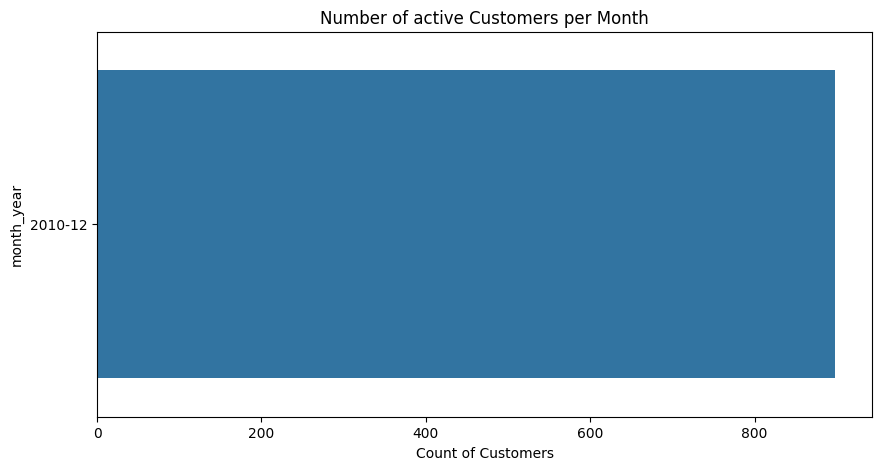

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel('Count of Customers')
plt.title('Number of active Customers per Month')

(2.b) Analyze the retention rate of customers.

In [ ]:
month_cohort - month_cohort.shift(1)

month_year
2010-12   NaN
Freq: M, Name: CustomerID, dtype: float64

In [ ]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12   NaN
Freq: M, Name: CustomerID, dtype: float64

Text(0.5, 1.0, 'Month-wise customer Retention Rate ')

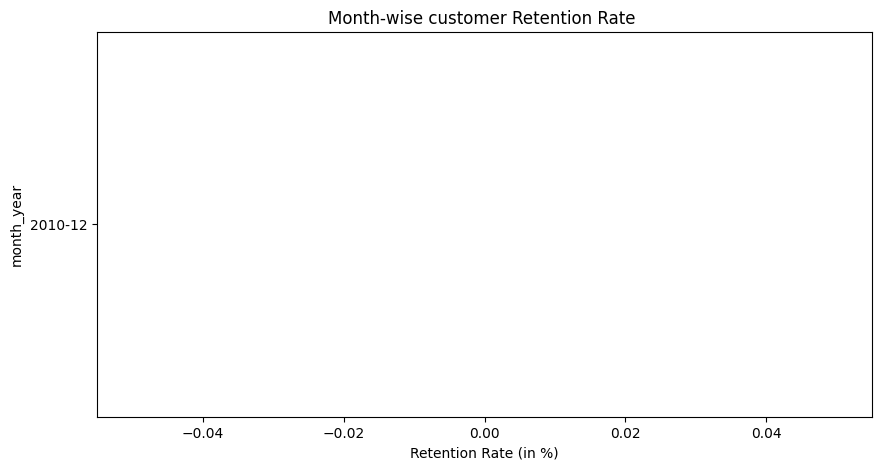

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel('Retention Rate (in %)')
plt.title('Month-wise customer Retention Rate ')

**Analysis**

Monetary analysis:


In [ ]:
df['amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [ ]:
# Check the data types of the relevant columns
print(df.dtypes)

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
month_year          period[M]
amount                float64
dtype: object


In [ ]:
df_monetary = df.groupby('CustomerID')['amount'].sum().reset_index()
df_monetary

,CustomerID,amount
0,12347.0,711.79
1,12348.0,892.80
2,12370.0,1864.27
3,12386.0,258.90
4,12395.0,679.92
...,...,...
893,18230.0,-81.00
894,18239.0,438.10
895,18259.0,376.30
896,18260.0,230.70


Frequency Analysis:

In [ ]:
df_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12347.0,1
1,12348.0,1
2,12370.0,2
3,12386.0,1
4,12395.0,2
...,...,...
893,18230.0,2
894,18239.0,1
895,18259.0,1
896,18260.0,1


Recency Analysis:

In [ ]:
ref_day = df['InvoiceDate'].max() + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,17
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,17
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,17
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,17
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,17


In [ ]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12347.0,11
1,12348.0,1
2,12370.0,1
3,12386.0,10
4,12395.0,1
...,...,...
893,18230.0,3
894,18239.0,15
895,18259.0,10
896,18260.0,1


Calculate RFM metrics:

In [ ]:
df_rf = pd.merge(df_recency, df_frequency, on='CustomerID', how='inner')
df_rf = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rf.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rf.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,11,1,711.79
1,12348.0,1,1,892.80
2,12370.0,1,2,1864.27
3,12386.0,10,1,258.90
4,12395.0,1,2,679.92


Build RFM Segments:


recency_labels
newest    325
medium    193
oldest    151
older     144
newer      85
Name: count, dtype: int64

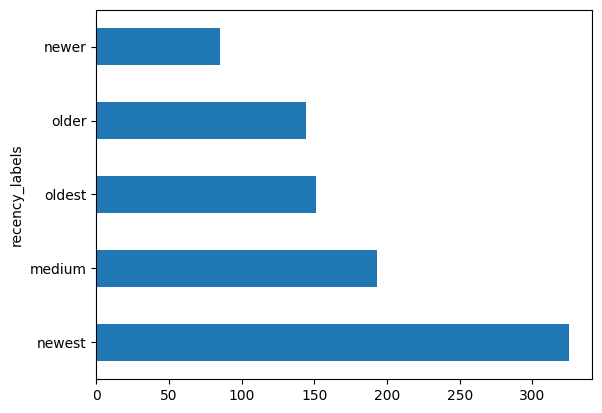

In [ ]:
# Assuming df_rf is the DataFrame you want to work with
df_rfm = df_rf.copy() # Creating a copy to avoid modifying the original DataFrame

df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5, labels=['newest','newer','medium','older','oldest'])
df_rfm['recency_labels'].value_counts().plot(kind='barh');
df_rfm['recency_labels'].value_counts()

frequency_labels
lowest     890
lower        6
highest      2
medium       0
higher       0
Name: count, dtype: int64

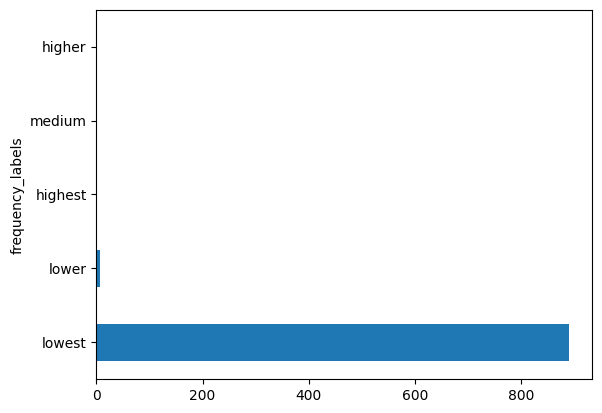

In [ ]:
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest','lower','medium','higher','highest']) # Use 'Frequency' instead of 'frequency'
df_rfm['frequency_labels'].value_counts().plot(kind='barh');
df_rfm['frequency_labels'].value_counts()

monetary_labels
smallest    889
smaller       6
medium        1
larger        1
largest       1
Name: count, dtype: int64

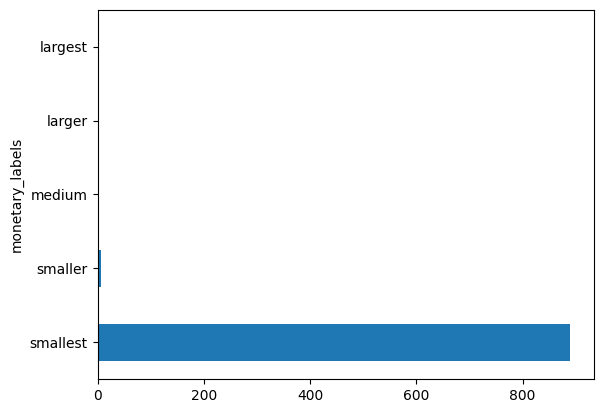

In [ ]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()


In [ ]:
df_rfm['rfm_segment']=df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg(''.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12347.0,11,1,711.79,older,lowest,smallest,olderlowestsmallest
1,12348.0,1,1,892.80,newest,lowest,smallest,newestlowestsmallest
2,12370.0,1,2,1864.27,newest,lowest,smallest,newestlowestsmallest
3,12386.0,10,1,258.90,medium,lowest,smallest,mediumlowestsmallest
4,12395.0,1,2,679.92,newest,lowest,smallest,newestlowestsmallest


RFM Score:

In [ ]:
recency_dict = {'newest': 5, 'newer': 4, 'medium': 3, 'older': 2, 'oldest':1}
frequency_dict = {'lowest': 1, 'lower': 2, 'medium': 3, 'higher': 4, 'highest': 5}
monetary_dict = {'smallest': 1, 'smaller': 2, 'medium': 3, 'larger': 4, 'largest': 5}
df_rfm['rfm_score'] = df_rfm['recency_labels'].map(recency_dict).astype(int)+df_rfm['frequency_labels'].map(frequency_dict).astype(int)+df_rfm['monetary_labels'].map(monetary_dict).astype(int)
df_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12347.0,11,1,711.79,older,lowest,smallest,olderlowestsmallest,4
1,12348.0,1,1,892.80,newest,lowest,smallest,newestlowestsmallest,7
2,12370.0,1,2,1864.27,newest,lowest,smallest,newestlowestsmallest,7
3,12386.0,10,1,258.90,medium,lowest,smallest,mediumlowestsmallest,5
4,12395.0,1,2,679.92,newest,lowest,smallest,newestlowestsmallest,7
5,12417.0,1,1,291.34,newest,lowest,smallest,newestlowestsmallest,7
6,12427.0,15,1,303.50,oldest,lowest,smallest,oldestlowestsmallest,3
7,12429.0,9,1,1281.50,medium,lowest,smallest,mediumlowestsmallest,5
8,12431.0,1,2,706.45,newest,lowest,smallest,newestlowestsmallest,7
9,12433.0,10,2,3787.12,medium,lowest,smallest,mediumlowestsmallest,5


Analyze RFM Segment and Score:

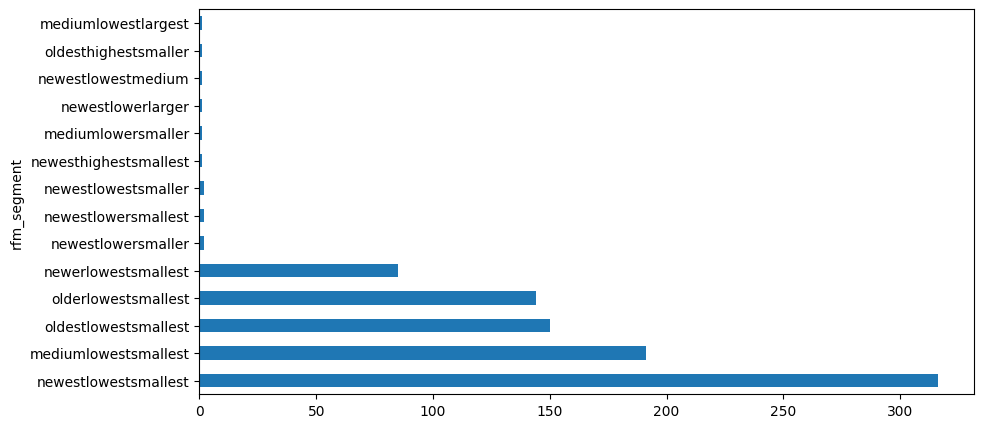

In [38]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10,5));


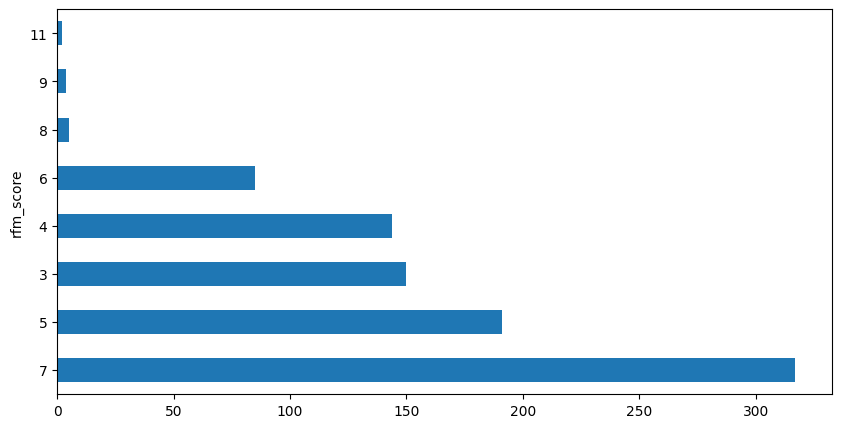

In [41]:
 df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10,5));

**Week 3**

**0.3.1 DATA MODELING:**

In [43]:
print(df_rfm.shape)
df_rfm.head()

(898, 9)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12347.0,11,1,711.79,older,lowest,smallest,olderlowestsmallest,4
1,12348.0,1,1,892.80,newest,lowest,smallest,newestlowestsmallest,7
2,12370.0,1,2,1864.27,newest,lowest,smallest,newestlowestsmallest,7
3,12386.0,10,1,258.90,medium,lowest,smallest,mediumlowestsmallest,5
4,12395.0,1,2,679.92,newest,lowest,smallest,newestlowestsmallest,7


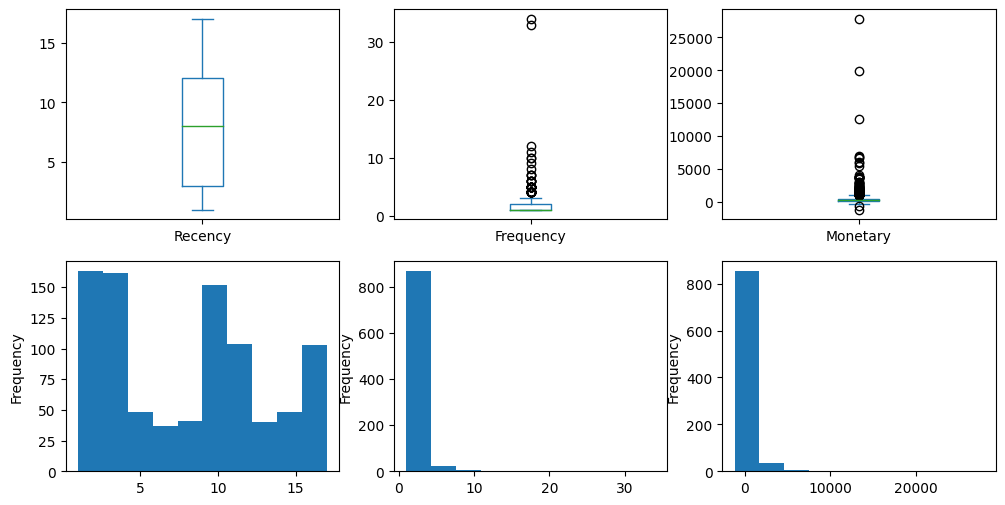

In [45]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2, 3, i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2, 3, i+1+3)
    df_rfm[feature].plot(kind='hist')

**Outliers:** Frequency and Monetary features in above data seem to have lot of outliers. Lets drop
them.

In [47]:
df_rfm = df_rfm[(df_rfm['Frequency'] < 10) & (df_rfm['Monetary'] < 4000)]
df_rfm.shape

(887, 9)

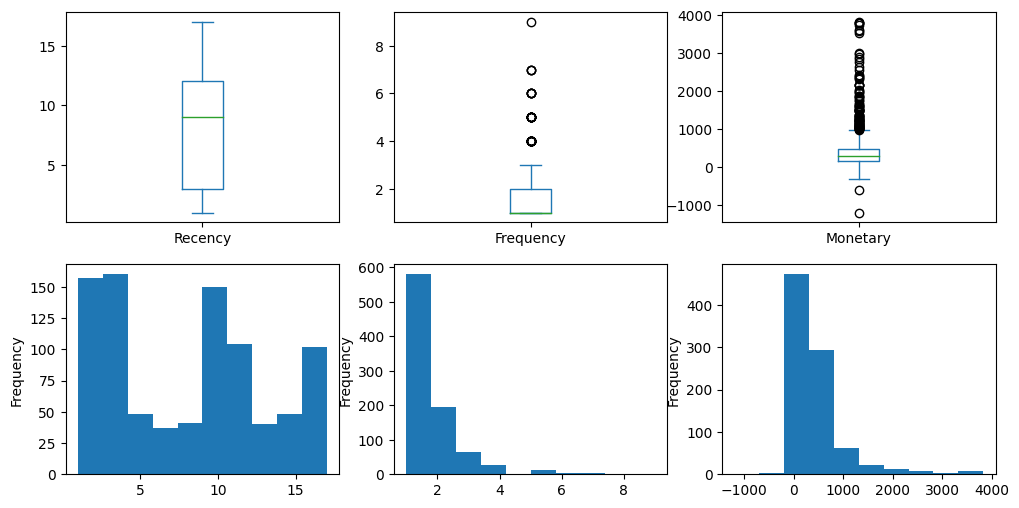

In [49]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')


**Log Transformation:** Now since all three features have right skewed data therefore we will use
log transformation of these features in our model.

In [50]:
df_rfm_log_trans = pd.DataFrame()
df_rfm_log_trans['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log_trans['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log_trans['Monetary'] = np.log(df_rfm['Monetary']-df_rfm['Monetary'].min()+1)


**Standard Scalar Transformation:** It is extremely important to rescale the features so that they
have a comparable scale.

In [52]:
scaler = StandardScaler()

# Use fit_transform to scale the data
df_rfm_scaled = scaler.fit_transform(df_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])

df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.707369,-0.667228,0.548777
1,-2.130356,-0.667228,0.803941
2,-2.130356,0.795079,1.878720
3,0.594577,-0.667228,-0.214331
4,-2.130356,0.795079,0.501351


**Build K-Means Clustering Model**

In [53]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [54]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

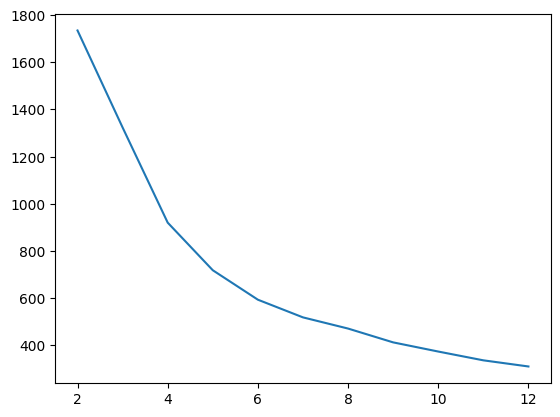

In [55]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_rfm_scaled)

    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd);

In [56]:
df_inertia = pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'inertia'])
df_inertia

,clusters,inertia
0,2,1734.982272
1,3,1323.648950
2,4,920.328512
3,5,718.550273
4,6,593.674411
5,7,518.726659
6,8,471.314159
7,9,412.738216
8,10,373.889509
9,11,336.641342


In [57]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print("For n_clusters ={0}, The silhouette score is {1}".format(num_clusters,silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =2, The silhouette score is 0.43497472123608505
For n_clusters =3, The silhouette score is 0.4397828023404227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =4, The silhouette score is 0.4238367386890558


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =5, The silhouette score is 0.4556245889460941


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =6, The silhouette score is 0.4645699799393826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =7, The silhouette score is 0.46907616262955665
For n_clusters =8, The silhouette score is 0.43572911561953


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =9, The silhouette score is 0.43382946706970404
For n_clusters =10, The silhouette score is 0.4401267002510501


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
 # Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

**Analyze these clusters and comment on the results.**

In [59]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score,Cluster_Id
0,12347.0,11,1,711.79,older,lowest,smallest,olderlowestsmallest,4,0
1,12348.0,1,1,892.80,newest,lowest,smallest,newestlowestsmallest,7,1
2,12370.0,1,2,1864.27,newest,lowest,smallest,newestlowestsmallest,7,1
3,12386.0,10,1,258.90,medium,lowest,smallest,mediumlowestsmallest,5,0
4,12395.0,1,2,679.92,newest,lowest,smallest,newestlowestsmallest,7,1


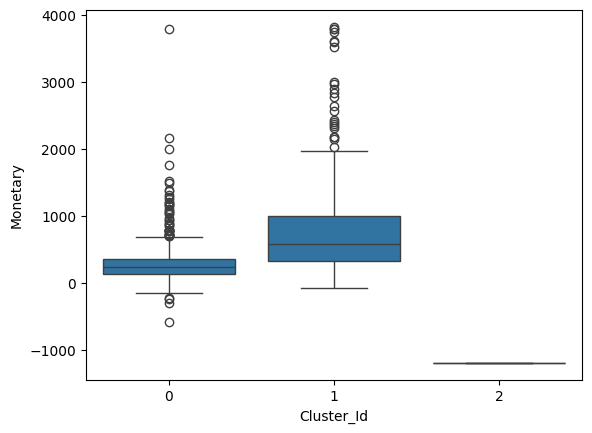

In [60]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm);

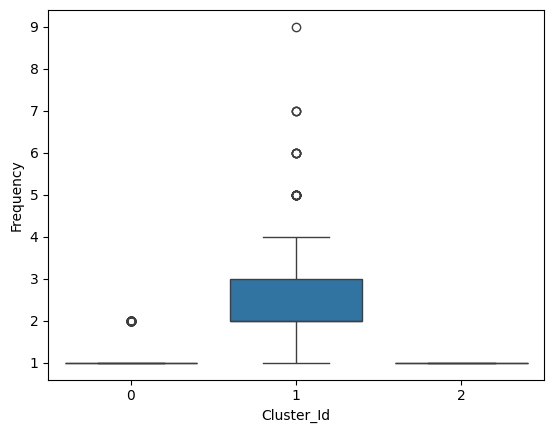

In [61]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm);

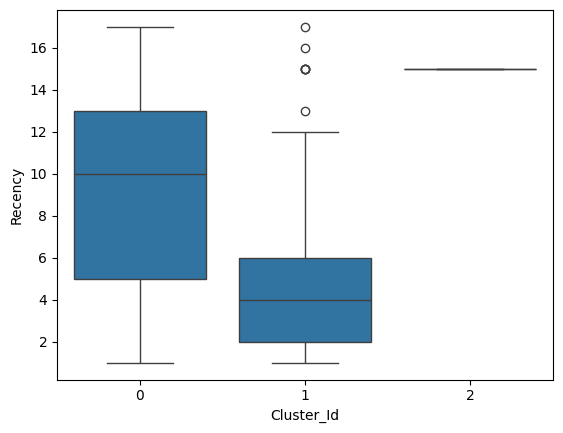

In [62]:
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm);

**0.4 Week 4:**


**Data Reporting:**

In [64]:

# Writing dataframe to excel file for creating visualization in tableau
with pd.ExcelWriter('/content/sample_data/output_data.xlsx') as writer:

    df.to_excel(writer, sheet_name='master_data', index=False)
    df_rfm.to_excel(writer, sheet_name='rfm_data', index=False)
    df_inertia.to_excel(writer, sheet_name='inertia', index=False)


In [67]:
product_desc = pd.read_csv("/content/Online Retail.csv", encoding='latin1')
product_desc = product_desc[['StockCode', 'Description']]
product_desc = product_desc.drop_duplicates()
product_desc.to_csv('product_desc.csv', index=False)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
